This project aims to analyze Instagram influencers' performance by examining key metrics such as followers, engagement rate, category, and post trends. We will:
- Identify top-performing influencers based on engagement.
- Analyze follower growth trends over time.
- Compare categories (Fashion, Beauty, Tech, etc.) for performance insights.
- Visualize trends & correlations to derive actionable insights.

#  1. Data Loading & Preprocessing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#load dataset
df = pd.read_csv('/kaggle/input/top-instagram-influencers-data-cleaned/top_insta_influencers_data.csv')
print("Dataset Shape:", df.shape)
df.head(10)

Dataset Shape: (200, 10)


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [3]:
print("\nData types:")
print(df.dtypes)


Data types:
rank                  int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object


In [4]:
#checking for duplicated rows
df.duplicated().sum()

0

In [5]:
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [6]:
df[['rank','total_likes']]

,rank,total_likes
0,1,29.0b
1,2,57.4b
2,3,6.0b
3,4,11.5b
4,5,12.5b
...,...,...
195,196,1.4b
196,197,1.5b
197,198,149.2m
198,199,1.7b


In [7]:
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
convert_column = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
df[convert_column] = df[convert_column].replace(replace, regex=True).astype(float)
df[convert_column]

,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,1.62,5900000.0
2,6.000000e+09,890.0,357300000.0,6800000.0,1.24,4400000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,0.20,665300.0
...,...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,1.40,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,0.64,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,0.26,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,1.42,467700.0


In [8]:
df.rename(columns={'channel_info': 'account_name'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   account_name       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [10]:
numerical_columns =['influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
corr_data = df[numerical_columns].corr()
corr_data

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
influence_score,1.000000,0.160068,0.367713,0.051478,-0.081891,0.036548,0.237675
posts,0.160068,1.000000,0.060398,-0.343087,-0.324068,-0.290080,0.233328
followers,0.367713,0.060398,1.000000,0.349195,-0.100905,0.300914,0.667539
avg_likes,0.051478,-0.343087,0.349195,1.000000,0.754587,0.845978,0.357940
60_day_eng_rate,-0.081891,-0.324068,-0.100905,0.754587,1.000000,0.869202,-0.019524
new_post_avg_like,0.036548,-0.290080,0.300914,0.845978,0.869202,1.000000,0.329326
total_likes,0.237675,0.233328,0.667539,0.357940,-0.019524,0.329326,1.000000


In [11]:
df.sort_values(by='influence_score', inplace=True)
df.tail(10)

,rank,account_name,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,1.390000e+10,Canada
13,14,taylorswift,91,530.0,222200000.0,2400000.0,1.01,2300000.0,1.300000e+09,United States
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States
20,21,katyperry,92,2000.0,170300000.0,715000.0,0.16,265100.0,1.500000e+09,NaN
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States


In [12]:
df.shape

(200, 10)

In [13]:
df.isnull().sum()

rank                  0
account_name          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       1
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [14]:
df.columns

Index(['rank', 'account_name', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

In [15]:
df.set_index('rank')

,account_name,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
94,mosalah,22,840.0,52500000.0,1800000.0,2.18,1100000.0,1.500000e+09,NaN
194,zidane,41,370.0,33500000.0,1100000.0,1.61,532700.0,3.919000e+08,France
77,karimbenzema,42,2000.0,56900000.0,878500.0,1.62,918900.0,1.800000e+09,Spain
128,maisa,42,1500.0,44500000.0,553000.0,0.67,294100.0,8.201000e+08,Brazil
175,nattinatasha,47,30.0,35900000.0,518100.0,0.80,285900.0,1.870000e+07,Czech Republic
...,...,...,...,...,...,...,...,...,...
7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States
21,katyperry,92,2000.0,170300000.0,715000.0,0.16,265100.0,1.500000e+09,NaN
8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States


# 2. Exploratory Data Analysis (EDA)

In [16]:
print("Descriptive Statistics:")
display(df[numerical_columns].describe().T)

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
influence_score,200.0,8.182000e+01,8.878159e+00,22.00,8.000000e+01,8.400000e+01,8.600000e+01,9.300000e+01
posts,200.0,3.499850e+03,3.475828e+03,10.00,9.475000e+02,2.100000e+03,5.025000e+03,1.750000e+04
followers,200.0,7.740950e+07,7.368727e+07,32800000.00,4.000000e+07,5.005000e+07,6.890000e+07,4.758000e+08
avg_likes,200.0,1.787104e+06,2.193359e+06,65100.00,5.044000e+05,1.100000e+06,2.100000e+06,1.540000e+07
60_day_eng_rate,199.0,1.902010e+00,3.329719e+00,0.01,4.100000e-01,8.800000e-01,2.035000e+00,2.641000e+01
new_post_avg_like,200.0,1.208132e+06,1.858322e+06,0.00,1.957500e+05,5.321500e+05,1.325000e+06,1.260000e+07
total_likes,200.0,3.658112e+09,5.561939e+09,18300000.00,9.968500e+08,2.000000e+09,3.900000e+09,5.740000e+10


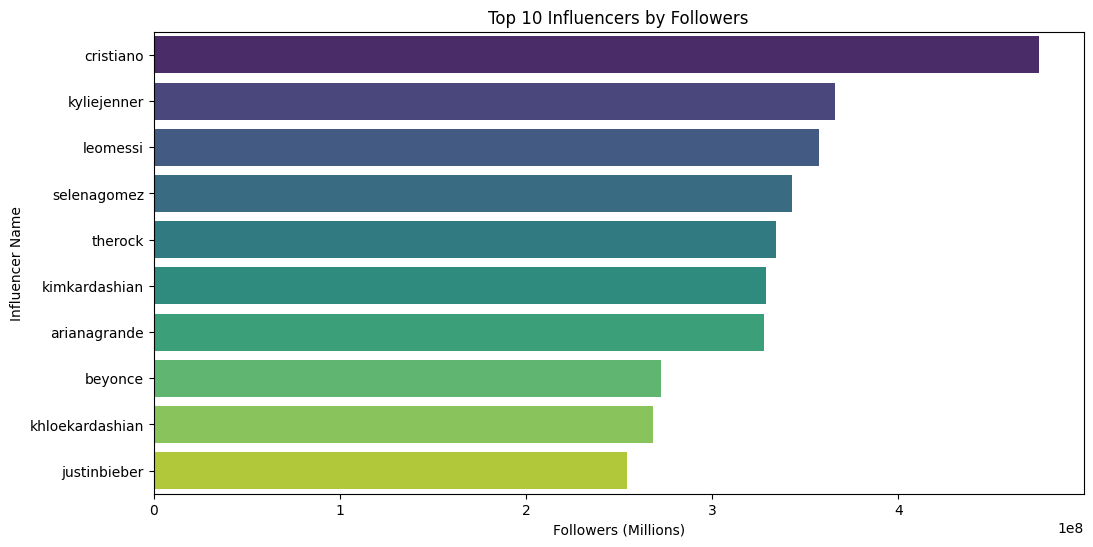

In [17]:
#top influencers
top_10 = df.sort_values('followers', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='followers', y='account_name', data=top_10, palette='viridis')
plt.title("Top 10 Influencers by Followers")
plt.xlabel("Followers (Millions)")
plt.ylabel("Influencer Name")
plt.show()

Christiano Ronaldo beats messi as the most followed influencer by followers 

In [18]:
#exploring top influcencers by country
top_inf = df.groupby('country')[['account_name', 'influence_score']].apply(lambda x: x.nlargest(1, 'influence_score')).reset_index(drop=True)
top_inf

,account_name,influence_score
0,norafatehi,83
1,chrishemsworth,86
2,neymarjr,90
3,mercedesbenz,77
4,justinbieber,91
5,jamesrodriguez10,86
6,nattinatasha,47
7,hrithikroshan,85
8,psg,86
9,bmw,79


In [19]:
#Calculating average values for selected columns by country
avg = df.groupby('country')[['followers', 'avg_likes', 'total_likes']].mean().reset_index()
avg

,country,followers,avg_likes,total_likes
0,Anguilla,4.160000e+07,1.400000e+06,2.300000e+09
1,Australia,5.590000e+07,2.800000e+06,2.500000e+09
2,Brazil,5.660769e+07,8.351846e+05,3.151485e+09
3,British Virgin Islands,3.600000e+07,1.979000e+05,2.000000e+09
4,Canada,1.193333e+08,2.466667e+06,8.500000e+09
5,Colombia,5.203333e+07,9.938667e+05,5.033333e+09
6,Czech Republic,3.590000e+07,5.181000e+05,1.870000e+07
7,CÃ´te d'Ivoire,4.370000e+07,1.600000e+06,9.499000e+08
8,France,4.483333e+07,7.697333e+05,1.745217e+09
9,Germany,3.370000e+07,2.313000e+05,2.200000e+09


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


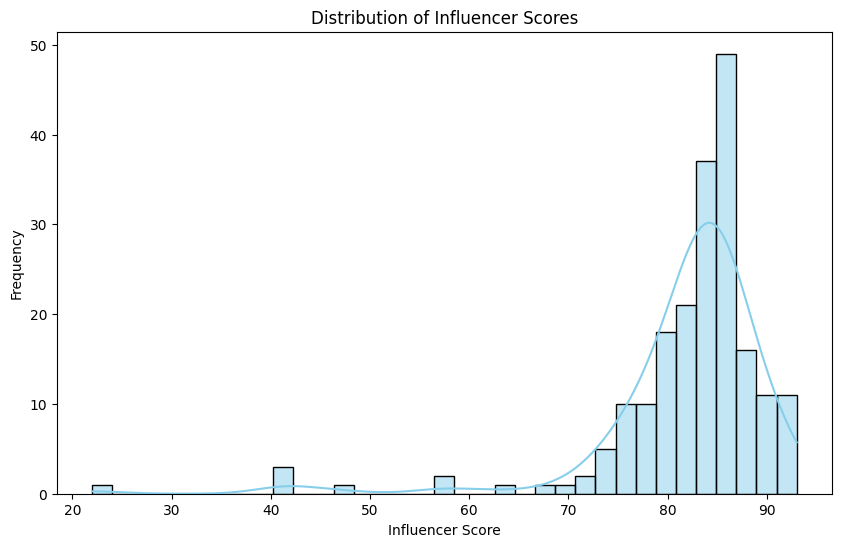

In [20]:
#visualization of influencer scores
plt.figure(figsize=(10, 6))
sns.histplot(df['influence_score'], kde=True, color='skyblue')
plt.title('Distribution of Influencer Scores')
plt.xlabel('Influencer Score')
plt.ylabel('Frequency')
plt.show()

Implications and Analysis:
- The skewness suggests instagrams dominance by top performers 
- Marketers should 75% to consider broader reach based on campaign goals

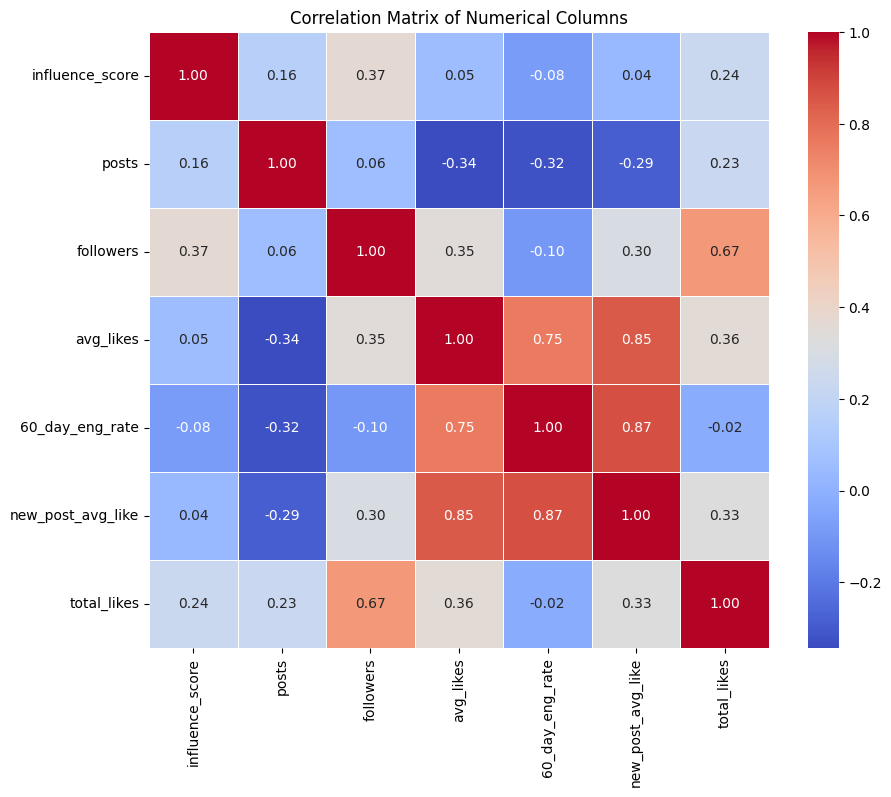

In [21]:
#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

Correlation Matrix Insights

1. Strong Positive Correlations (>0.7)

60_day_eng_rate & new_post_avg_like (r=0.87):
Reveals that engagement rate strongly predicts immediate post performance, suggesting content quality directly impacts audience interaction.

avg_likes & new_post_avg_like (r=0.85):
Indicates remarkable consistency in like patterns, meaning influencers maintain stable engagement levels across posts.

2. Moderate Relationships (0.3-0.7)

followers & total_likes (r=0.67):
*Shows follower count explains about 45% of like variance (r²=0.45), confirming larger audiences generate more total engagement, but with diminishing returns per follower.*

3. Notable Weak Correlation (<0.3)

total_likes & posts (r=0.23):
Surprisingly weak link suggests post frequency alone doesn't guarantee cumulative engagement - content quality and timing likely outweigh sheer volume.

Implications:

- There could maybe be prioritization of engagement quality over follower growth (stronger r-values on engagement metrics)
- Content consistency matters more than post frequency (weak post-to-likes correlation)
- New post performance reliably indicates overall engagement patterns (0.85+ correlations)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


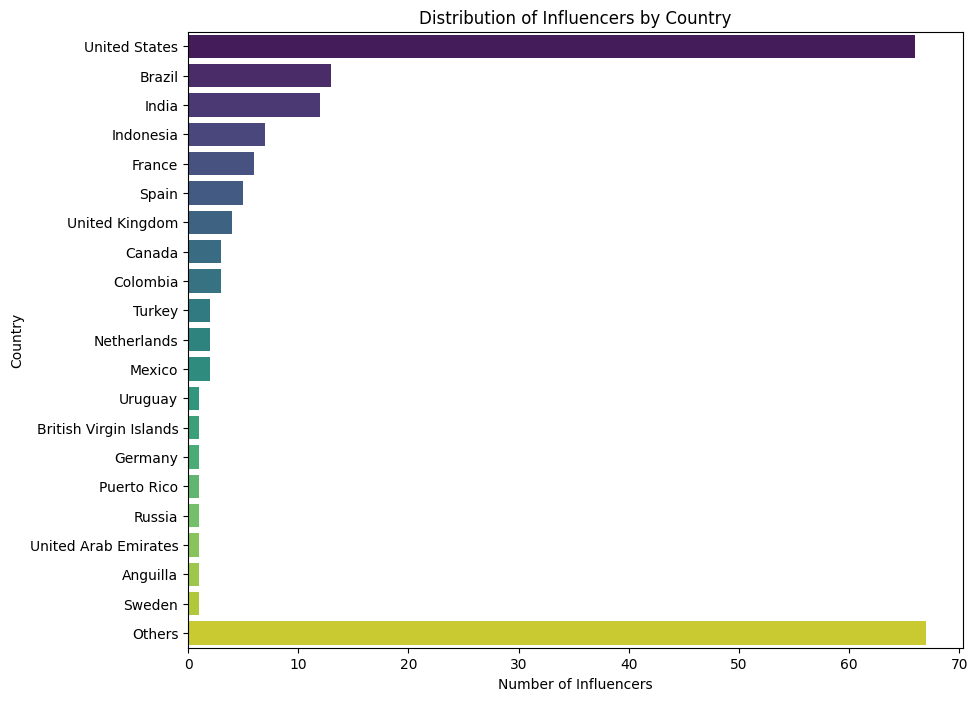

In [22]:
#distribtuion of influencers by country 
country= df['country'].value_counts()[:20].to_list()
name_countries = df['country'].value_counts().index[:20].to_list()

name_countries.append("Others")
max20 = sum(country)
others = len(df) - max20

country.append(others)

plt.figure(figsize=(10, 8))
sns.barplot(x=country, y=name_countries, palette='viridis')
plt.title('Distribution of Influencers by Country')
plt.xlabel('Number of Influencers')
plt.ylabel('Country')
plt.show()

A large proportion of influencers are situated in US, followed far off by Brazil and India